                                                name            neighbourhood  \
0                 Cottage! BonPaul + Sharky's Hostel  Neighborhood highlights   
1                       Tranquil Room & Private Bath                      NaN   
2                                    Terrace Cottage  Neighborhood highlights   
3                          Asheville Dreamer's Cabin                      NaN   
4  Asheville Urban Farmhouse Entire Home 4.6 mi t...  Neighborhood highlights   

     price  availability_365  
0   $89.00               254  
1   $49.00                88  
2  $110.00               233  
3   $80.00                62  
4  $224.00                 0  


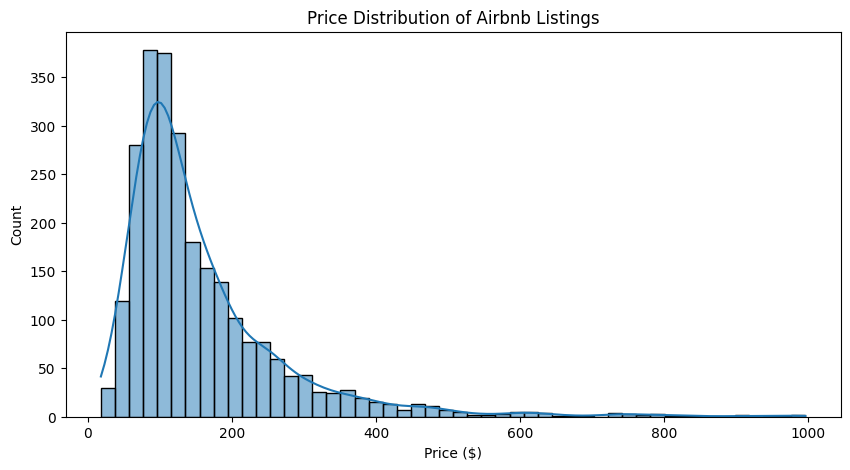

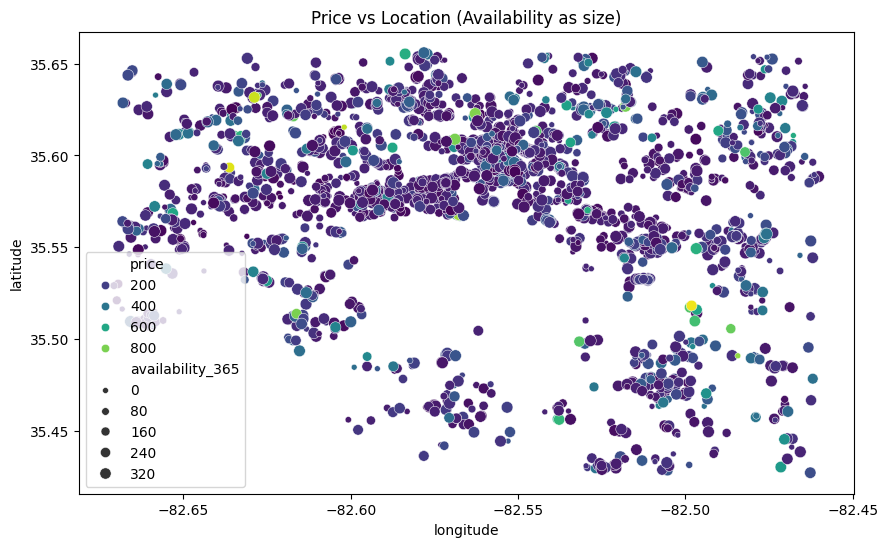

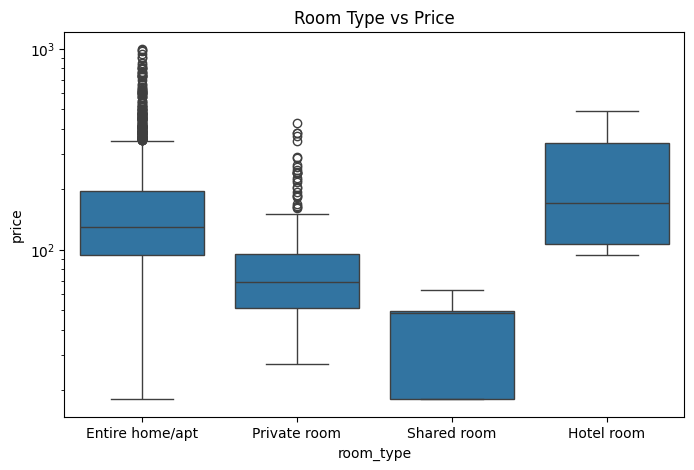

                     price  latitude  longitude  availability_365
price             1.000000 -0.013493   0.049019          0.079139
latitude         -0.013493  1.000000  -0.180183         -0.045885
longitude         0.049019 -0.180183   1.000000          0.011261
availability_365  0.079139 -0.045885   0.011261          1.000000


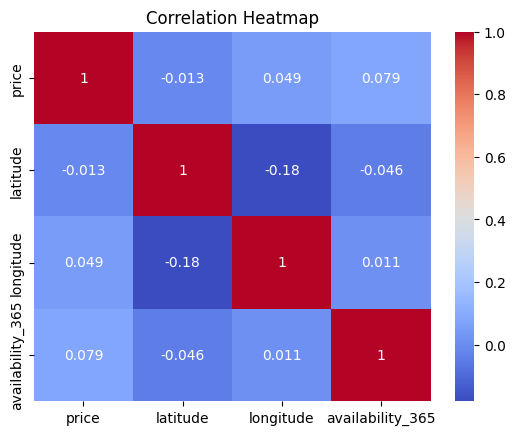

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("/content/listings.csv.gz", compression='gzip', low_memory=False)

# Preview
print(df[['name', 'neighbourhood', 'price', 'availability_365']].head())

# Convert price to numeric (remove $ and ,)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop missing values in key columns
df_clean = df[['price', 'latitude', 'longitude', 'availability_365', 'room_type']].dropna()

# Remove extreme outliers
df_clean = df_clean[df_clean['price'] < 1000]

# --- PRICE DISTRIBUTION ---
plt.figure(figsize=(10,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price ($)")
plt.show()

# --- PRICE vs LOCATION ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='availability_365', data=df_clean, palette='viridis')
plt.title("Price vs Location (Availability as size)")
plt.show()

# --- ROOM TYPE ANALYSIS ---
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df_clean)
plt.yscale('log')  # better scale for skewed data
plt.title("Room Type vs Price")
plt.show()

# --- CORRELATION ---
print(df_clean.corr(numeric_only=True))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
